In [19]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, roc_curve, precision_recall_curve
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import feature_selection
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
import matplotlib.pyplot as plt

In [20]:

df = pd.read_csv('cleaned_data.csv')
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,number_diagnoses,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,20123568,1,1,75,1,22,7,7,0,0,...,9,0,0,0,0,0,0,0,0,0
1,20408121,1,1,95,1,1,7,4,0,1,...,6,0,0,0,1,0,1,1,0,0
2,20542797,1,2,75,1,2,7,10,0,2,...,6,1,0,0,1,0,0,0,0,0
3,7239654,1,1,75,1,3,6,12,1,2,...,5,0,0,0,1,0,0,1,0,0
4,15466212,1,2,75,1,3,6,12,0,2,...,5,0,0,0,1,0,1,1,1,0


In [21]:
df.shape

(12991, 29)

In [22]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
patient_nbr,12991.0,5.432964e+07,3.822412e+07,10377.0,23843074.5,42502914.0,91315831.5,189365864.0
race,12991.0,1.324917e+00,6.809587e-01,1.0,1.0,1.0,1.0,5.0
gender,12991.0,1.458548e+00,4.982980e-01,1.0,1.0,1.0,2.0,2.0
age,12991.0,6.691363e+01,1.538229e+01,5.0,55.0,65.0,75.0,95.0
admission_type_id,12991.0,1.943422e+00,8.975810e-01,1.0,1.0,2.0,3.0,6.0
discharge_disposition_id,12991.0,2.766608e+00,4.154339e+00,1.0,1.0,1.0,3.0,28.0
admission_source_id,12991.0,4.782927e+00,3.241449e+00,1.0,1.0,7.0,7.0,17.0
time_in_hospital,12991.0,4.025556e+00,2.572633e+00,1.0,2.0,3.0,5.0,12.0
payer_code,12991.0,2.464244e+00,3.430394e+00,0.0,0.0,0.0,4.0,15.0
medical_specialty,12991.0,6.617504e+00,8.792941e+00,0.0,1.0,2.0,8.0,51.0


In [23]:
print(list(df.select_dtypes(include=[np.number])))

['patient_nbr', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'payer_code', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'metformin', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed', 'readmitted']


In [24]:
numerical_features = ['patient_nbr', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
                      'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient',
                      'number_emergency', 'number_inpatient', 'number_diagnoses', 'readmitted']

clf = linear_model.LogisticRegression()
X = df[numerical_features]
Y = df['readmitted']

clf.fit(X, Y)

# Printing model evaluation metrics and coefficients
print("Model score:\n {}".format(clf.score(X,Y)))
print("Intercept:\n {}".format(clf.intercept_))
print("Coefficients:\n")
for feat, coef in zip(numerical_features, clf.coef_[0]):
    print(" {:>20}: {}".format(feat, coef))

Model score:
 0.920483411592641
Intercept:
 [-3.96691486e-15]
Coefficients:

          patient_nbr: -3.918630211053384e-08
                  age: -2.5070173326784684e-13
    admission_type_id: -6.762349424240621e-15
 discharge_disposition_id: -5.4538259840174284e-15
  admission_source_id: -1.8165496463316693e-14
     time_in_hospital: -1.4596911409851645e-14
   num_lab_procedures: -1.6874115387693265e-13
       num_procedures: -4.545889722214675e-15
      num_medications: -5.1877127107049424e-14
    number_outpatient: 0.0
     number_emergency: 0.0
     number_inpatient: -1.2913320755253632e-16
     number_diagnoses: -2.2120942402813392e-14
           readmitted: 3.0766021649382412e-15


In [25]:
# Splitting the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Creating and fitting the logistic regression model
clf = linear_model.LogisticRegression()
clf.fit(X_train, Y_train)

# Printing model scores against training and test data
print("Score against training data: {}".format(clf.score(X_train, Y_train)))
print("Score against test data: {}".format(clf.score(X_test, Y_test)))

Score against training data: 0.9219591993841416
Score against test data: 0.9145825317429781


In [26]:

df_cat_cols = df.select_dtypes(include=['object']).columns.tolist()

In [27]:
le = LabelEncoder()
for col in df_cat_cols:
    df[col] = le.fit_transform(df[col])

In [28]:

df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,number_diagnoses,metformin,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted
0,20123568,1,1,75,1,22,7,7,0,0,...,9,0,0,0,0,0,0,0,0,0
1,20408121,1,1,95,1,1,7,4,0,1,...,6,0,0,0,1,0,1,1,0,0
2,20542797,1,2,75,1,2,7,10,0,2,...,6,1,0,0,1,0,0,0,0,0
3,7239654,1,1,75,1,3,6,12,1,2,...,5,0,0,0,1,0,0,1,0,0
4,15466212,1,2,75,1,3,6,12,0,2,...,5,0,0,0,1,0,1,1,1,0


In [29]:
# Create a logistic regression model
model = linear_model.LogisticRegression()

# Define the feature matrix X0 and the target variable Y0
X0 = df.loc[:, df.columns != 'readmitted']
Y0 = df['readmitted']

# Initialize the RFE selector with a logistic regression model and select 15 features with a step of 2
selector = feature_selection.RFE(model, n_features_to_select=15, step=2)

# Fit the selector to the data
selector = selector.fit(X0, Y0)

# Get the selected features based on the support_ attribute of the selector
selected_features = X0.loc[:, selector.support_]

# Print the selected features
print("Selected features:\n{}".format(',\n'.join(list(selected_features))))

Selected features:
race,
gender,
admission_type_id,
discharge_disposition_id,
admission_source_id,
time_in_hospital,
num_procedures,
number_diagnoses,
metformin,
glipizide,
pioglitazone,
rosiglitazone,
insulin,
change,
diabetesMed


In [30]:
# Assigning selected features to X
X = selected_features

# Assigning the target variable 'income' to Y
Y = df['readmitted']

# Splitting the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(X, Y, test_size=0.2, random_state=0)

# Creating a logistic regression classifier
clf = linear_model.LogisticRegression()

# Fitting the classifier to the training data
clf.fit(trainX, trainY)

# Predicting the target variable for the test set
predicted = clf.predict(testX)

# Calculating the mean hits (proportion of correctly predicted instances)
mean_hits = np.mean(predicted == testY)

# Calculating the accuracy score
acc = accuracy_score(testY, predicted)

# Performing 10-fold cross-validation and computing the mean scores
scores = cross_val_score(linear_model.LogisticRegression(), X, Y, scoring='accuracy')
cross_val_mean_scores = scores.mean()

# Printing the mean hits, accuracy score, and cross-validation mean scores
print("Mean hits: {}".format(mean_hits))
print("Accuracy score: {}".format(acc))
print("Cross-validation mean scores: {}".format(cross_val_mean_scores))

Mean hits: 0.9292035398230089
Accuracy score: 0.9292035398230089
Cross-validation mean scores: 0.9204834215564048


In [31]:
def classify_for_threshold(clf, testX, testY, t):
    # Predicting probabilities for the positive class
    prob_data = pd.DataFrame(clf.predict_proba(testX)[:, 1])
    
    # Classifying based on the specified threshold
    prob_data['predict'] = np.where(prob_data[0] >= t, 1, 0)
    
    # Adding the actual labels
    prob_data['actual'] = testY
    
    # Creating a cross-tabulation of predicted vs. actual labels
    return pd.crosstab(prob_data['actual'], prob_data['predict'])

# Specified thresholds
thresholds = [0.05, 0.10, 0.20]
for threshold in thresholds:
    confusion_matrix = classify_for_threshold(clf, testX, testY, threshold)
    print("\nConfusion Matrix for Threshold {}: \n{}".format(threshold, confusion_matrix))


Confusion Matrix for Threshold 0.05: 
predict   0    1
actual          
0.0      53  398
1.0       1   36

Confusion Matrix for Threshold 0.1: 
predict    0    1
actual           
0.0      338  113
1.0       31    6

Confusion Matrix for Threshold 0.2: 
predict    0  1
actual         
0.0      448  3
1.0       37  0


AUC = 0.5928346385813305


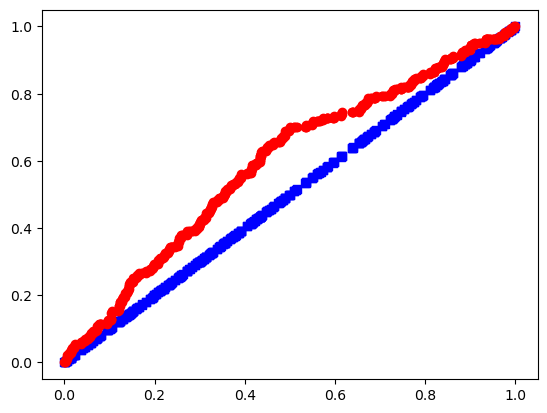

In [32]:

# Predicting probabilities for the positive class
prob = np.array(clf.predict_proba(testX)[:, 1])

# Incrementing testY by 1 to convert the labels to 1 and 2
testY += 1

# Calculating the false positive rate and sensitivity (true positive rate) for ROC curve
fpr, sensitivity, _ = roc_curve(testY, prob, pos_label=2)

# Computing the Area Under Curve (AUC) for the ROC curve
print("AUC = {}".format(auc(fpr, sensitivity)))

# Plotting the ROC curve
plt.scatter(fpr, fpr, c='b', marker='s')  # Plotting the line y = x (diagonal)
plt.scatter(fpr, sensitivity, c='r', marker='o')  # Plotting the ROC curve
plt.show()

[[0.87690278 0.12309722]
 [0.89370924 0.10629076]
 [0.93026426 0.06973574]
 ...
 [0.93647091 0.06352909]
 [0.95838531 0.04161469]
 [0.91358905 0.08641095]]


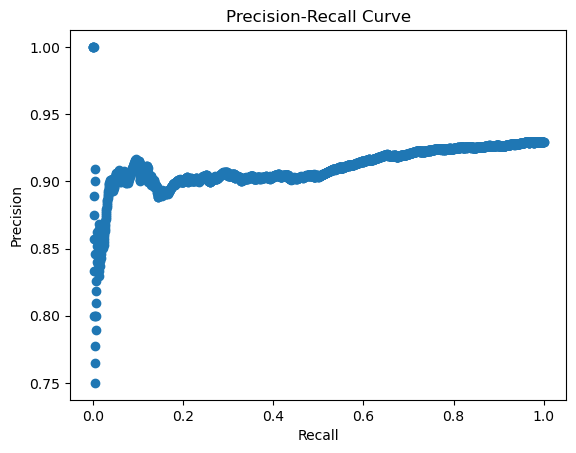

In [39]:
pred_score = clf.predict_proba(testX)
print(pred_score)

# Adjusting testY to binary labels
testY_binary = testY.copy()
testY_binary[testY_binary == 2] = 0  # Assuming label 2 is the negative class

p, r, t = precision_recall_curve(y_true=testY_binary, probas_pred=pred_score[:, 1])

plt.figure()
plt.scatter(r, p)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [40]:
# Create an undersampler object
undersampler = RandomUnderSampler(random_state=42)

# Undersample the data
X_undersampled, y_undersampled = undersampler.fit_resample(X, Y)

# Check the new class distribution
print("Original dataset shape:", Counter(Y))
print("Undersampled dataset shape:", Counter(y_undersampled))

# Split the undersampled data into train and test sets
trainX, testX, trainY, testY = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=0)


# Creating a logistic regression classifier
clf_under = linear_model.LogisticRegression()

# Fitting the classifier to the training data
clf_under.fit(trainX, trainY)

# Predicting the target variable for the test set
predicted = clf_under.predict(testX)

# Calculating the mean hits (proportion of correctly predicted instances)
mean_hits = np.mean(predicted == testY)

# Calculating the accuracy score
accuracy_score = accuracy_score(testY, predicted)

# Performing 10-fold cross-validation and computing the mean scores
scores = cross_val_score(linear_model.LogisticRegression(), X_undersampled, y_undersampled, scoring='accuracy', cv=10)
cross_val_mean_scores = scores.mean()

Original dataset shape: Counter({0: 11958, 1: 1033})
Undersampled dataset shape: Counter({0: 1033, 1: 1033})


In [41]:

# Printing the mean hits, accuracy score, and cross-validation mean scores
print("Mean hits: {}".format(mean_hits))
print("Accuracy score: {}".format(accuracy_score))
print("Cross-validation mean scores: {}".format(cross_val_mean_scores))

Mean hits: 0.572463768115942
Accuracy score: 0.572463768115942
Cross-validation mean scores: 0.5484850616762816


In [42]:
# Specified thresholds
thresholds = [0.4, 0.45, 0.5]
for threshold in thresholds:
    confusion_matrix = classify_for_threshold(clf_under, testX, testY, threshold)
    print("\nConfusion Matrix for Threshold {}: \n{}".format(threshold, confusion_matrix))


Confusion Matrix for Threshold 0.4: 
predict  0  1
actual       
0.0      0  7
1.0      2  1

Confusion Matrix for Threshold 0.45: 
predict  0  1
actual       
0.0      3  4
1.0      2  1

Confusion Matrix for Threshold 0.5: 
predict  0  1
actual       
0.0      5  2
1.0      3  0


AUC = 0.5963531310673934


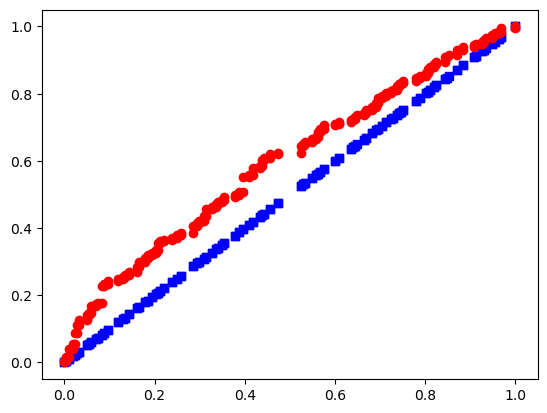

In [43]:
# Predicting probabilities for the positive class
prob = np.array(clf_under.predict_proba(testX)[:, 1])

# Incrementing testY by 1 to convert the labels to 1 and 2
testY += 1

# Calculating the false positive rate and sensitivity (true positive rate) for ROC curve
fpr, sensitivity, _ = roc_curve(testY, prob, pos_label=2)

# Computing the Area Under Curve (AUC) for the ROC curve
print("AUC = {}".format(auc(fpr, sensitivity)))

# Plotting the ROC curve
plt.scatter(fpr, fpr, c='b', marker='s')  # Plotting the line y = x (diagonal)
plt.scatter(fpr, sensitivity, c='r', marker='o')  # Plotting the ROC curve
plt.show()

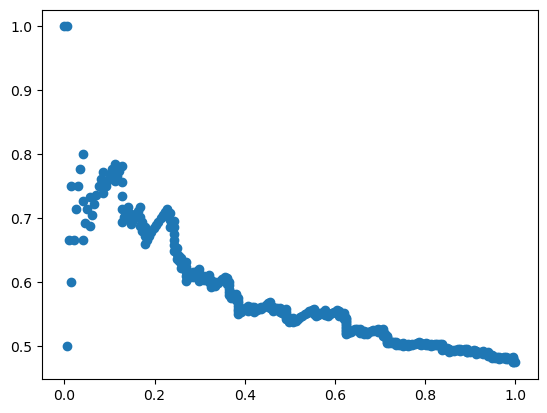

In [44]:
pred_score = clf_under.predict_proba(testX)

testY = testY - 1  # Assuming testY has values 1 and 2

p,r,t = precision_recall_curve(y_true=testY, probas_pred=pred_score[:,1])
plt.figure()
plt.scatter(r,p)
plt.show()

In [53]:
# Check the new class distribution
print("Original dataset shape:", Counter(Y))
print("Undersampled dataset shape:", Counter(y_over))

# Split the undersampled data into train and test sets
trainX, testX, trainY, testY = train_test_split(X_over, y_over, test_size=0.2, random_state=0)


# Creating a logistic regression classifier
clf_over = linear_model.LogisticRegression()

# Fitting the classifier to the training data
clf_over.fit(trainX, trainY)

# Predicting the target variable for the test set
predicted = clf_over.predict(testX)

# Calculating the mean hits (proportion of correctly predicted instances)
mean_hits = np.mean(predicted == testY)
# Performing 10-fold cross-validation and computing the mean scores
scores = cross_val_score(linear_model.LogisticRegression(), X_over, y_over, scoring='accuracy', cv=10)
cross_val_mean_scores = scores.mean()

# Printing the mean hits, accuracy score, and cross-validation mean scores
print("Mean hits: {}".format(mean_hits))
print("Accuracy score: {}".format(acc))
print("Cross-validation mean scores: {}".format(cross_val_mean_scores))

Original dataset shape: Counter({0: 11958, 1: 1033})
Undersampled dataset shape: Counter({0: 11958, 1: 11958})
Mean hits: 0.5641722408026756
Accuracy score: 0.9292035398230089
Cross-validation mean scores: 0.5523016915439588


In [50]:
# Specified thresholds
thresholds = [0.4, 0.5, 0.6]
for threshold in thresholds:
    confusion_matrix = classify_for_threshold(clf_over, testX, testY, threshold)
    print("\nConfusion Matrix for Threshold {}: \n{}".format(threshold, confusion_matrix))


Confusion Matrix for Threshold 0.4: 
predict   0    1
actual          
0.0      92  785
1.0       5   60

Confusion Matrix for Threshold 0.5: 
predict    0    1
actual           
0.0      421  456
1.0       27   38

Confusion Matrix for Threshold 0.6: 
predict    0    1
actual           
0.0      777  100
1.0       56    9


AUC = 0.5846370356153302


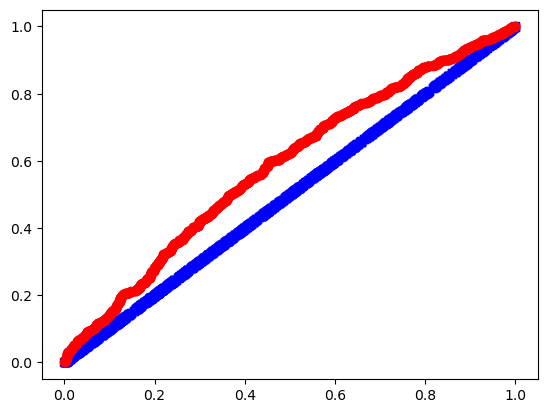

In [51]:
# Predicting probabilities for the positive class
prob = np.array(clf_over.predict_proba(testX)[:, 1])

# Incrementing testY by 1 to convert the labels to 1 and 2
testY += 1

# Calculating the false positive rate and sensitivity (true positive rate) for ROC curve
fpr, sensitivity, _ = roc_curve(testY, prob, pos_label=2)

# Computing the Area Under Curve (AUC) for the ROC curve
print("AUC = {}".format(auc(fpr, sensitivity)))

# Plotting the ROC curve
plt.scatter(fpr, fpr, c='b', marker='s')  # Plotting the line y = x (diagonal)
plt.scatter(fpr, sensitivity, c='r', marker='o')  # Plotting the ROC curve
plt.show()

[[0.43117375 0.56882625]
 [0.44023475 0.55976525]
 [0.51740251 0.48259749]
 ...
 [0.41966702 0.58033298]
 [0.48496536 0.51503464]
 [0.45184103 0.54815897]]


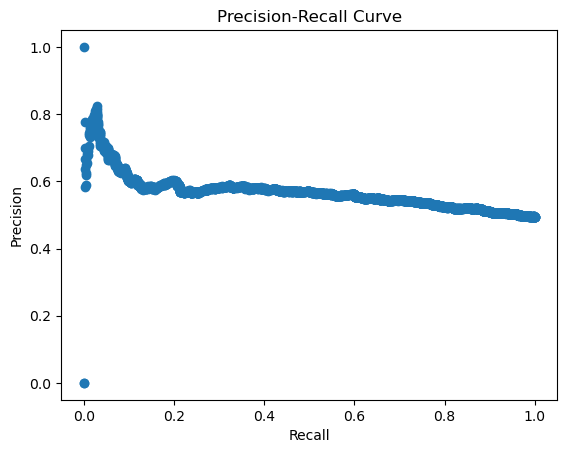

In [52]:
pred_score = clf_over.predict_proba(testX)
print(pred_score)

testY = testY - 1  # testY has values 1 and 2

p, r, t = precision_recall_curve(y_true=testY, probas_pred=pred_score[:, 1])

plt.figure()
plt.scatter(r, p)

# Add labels to the x-axis and y-axis
plt.xlabel('Recall')
plt.ylabel('Precision')

# Add a title to the plot (optional)
plt.title('Precision-Recall Curve')

plt.show()